In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd "/content/drive/My Drive/Sbermarket_data"

/content/drive/My Drive/Sbermarket_data


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
!ls

kaggle.json


In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c test-recsys -p "/content/drive/My Drive/Sbermarket_data"

 98% 109M/111M [00:01<00:00, 59.1MB/s] 
100% 111M/111M [00:01<00:00, 67.9MB/s]
 94% 115M/123M [00:01<00:00, 76.5MB/s]
100% 123M/123M [00:01<00:00, 87.7MB/s]
 91% 99.0M/109M [00:01<00:00, 62.0MB/s]
100% 109M/109M [00:01<00:00, 72.6MB/s] 
 94% 113M/120M [00:03<00:00, 40.2MB/s] 
100% 120M/120M [00:03<00:00, 36.7MB/s]
 94% 97.0M/103M [00:01<00:00, 99.4MB/s]
100% 103M/103M [00:01<00:00, 95.5MB/s] 
 98% 125M/128M [00:01<00:00, 96.8MB/s]
100% 128M/128M [00:01<00:00, 68.6MB/s]
 95% 106M/111M [00:02<00:00, 51.3MB/s] 
100% 111M/111M [00:02<00:00, 55.1MB/s]
 96% 100M/104M [00:01<00:00, 62.5MB/s] 
100% 104M/104M [00:01<00:00, 60.1MB/s]
 87% 91.0M/104M [00:01<00:00, 61.6MB/s]
100% 104M/104M [00:01<00:00, 86.2MB/s] 
 90% 100M/112M [00:01<00:00, 59.5MB/s] 
100% 112M/112M [00:01<00:00, 59.4MB/s]
 93% 89.0M/96.2M [00:01<00:00, 73.6MB/s]
100% 96.2M/96.2M [00:01<00:00, 66.3MB/s]
 95% 131M/137M [00:02<00:00, 85.1MB/s]
100% 137M/137M [00:02<00:00, 66.3MB/s]
 88% 95.0M/108M [00:01<00:00, 90.7MB/s]
100% 108M

In [ ]:
!ls

kaggle.json			   tab_2_products_2020-05-20.csv.zip
sample_submission.csv.zip	   tab_2_products_2020-05-30.csv.zip
tab_1_orders.csv.zip		   tab_2_products_2020-06-09.csv.zip
tab_2_products_2020-01-01.csv.zip  tab_2_products_2020-06-19.csv.zip
tab_2_products_2020-01-11.csv.zip  tab_2_products_2020-06-29.csv.zip
tab_2_products_2020-01-21.csv.zip  tab_2_products_2020-07-09.csv.zip
tab_2_products_2020-01-31.csv.zip  tab_2_products_2020-07-19.csv.zip
tab_2_products_2020-02-10.csv.zip  tab_2_products_2020-07-29.csv.zip
tab_2_products_2020-02-20.csv.zip  tab_2_products_2020-08-08.csv.zip
tab_2_products_2020-03-01.csv.zip  tab_2_products_2020-08-18.csv.zip
tab_2_products_2020-03-11.csv.zip  tab_2_products_2020-08-28.csv.zip
tab_2_products_2020-03-21.csv.zip  tab_2_products_2020-09-07.csv.zip
tab_2_products_2020-03-31.csv.zip  tab_3_categories.csv
tab_2_products_2020-04-10.csv.zip  tab_4_user_profiles.csv.zip
tab_2_products_2020-04-20.csv.zip  tab_5_product_properties.csv.zip
tab_2_products_2020

In [ ]:
!mkdir tab_2

!unzip -q tab_2_products_2020-04-10.csv.zip -d tab_2/ 
!unzip -q tab_2_products_2020-04-30.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-04-20.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-08-08.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-08-18.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-09-07.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-08-28.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-05-30.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-05-10.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-05-20.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-07-09.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-07-19.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-07-29.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-06-09.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-06-19.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-06-29.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-03-21.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-01-21.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-02-10.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-03-11.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-03-01.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-01-31.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-03-31.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-02-20.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-01-11.csv.zip -d tab_2/
!unzip -q tab_2_products_2020-01-01.csv.zip -d tab_2/

In [ ]:
!mkdir tab_1

!unzip -q tab_1_orders.csv.zip -d tab_1/

## Input preparation

In [ ]:
# Read plants.csv
data_orders = pd.read_csv(
    # file path
    "tab_1/tab_1_orders.csv"
)
# Viewing the first 5 rows
data_orders.head(5)

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web


In [ ]:
# create a list of tab_2 in order
Seq_data_products = os.listdir("tab_2")
Seq_data_products_dates = []
for i in range(len(Seq_data_products)):
  Seq_data_products_dates.append(Seq_data_products[i][-14:-4])

Seq_data_products_ordered = [line for (time,line) in sorted(zip(Seq_data_products_dates, Seq_data_products))] 

In [ ]:
train_data = {}

# Create a dictionary for unique users and their sequential order_id
Unique_Users = data_orders.user_id.unique()
for user in Unique_Users:
  train_data[user] = []

In [ ]:
# ~3hrs and 20 min
for tab2 in Seq_data_products_ordered:
  data_products = pd.read_csv("tab_2/"+tab2)
  users = data_products.user_id.unique()
  for i in range(len(users)):
    test_user = users[i]
    if test_user not in train_data:
      train_data[test_user] = []
    #table of orders for each user
    test_user_order_ids = data_products[data_products['user_id'] == test_user]
    #unique orders of this user
    orders = list(test_user_order_ids.order_id.unique())
    #order the unique values by order_id
    orders.sort()
    for j in range(len(orders)):
      #product ids in each order
      test_user_ord_prd = test_user_order_ids[test_user_order_ids['order_id'] == orders[j]].product_id.unique()
      train_data[test_user].append(list(test_user_ord_prd))

In [ ]:
Final_Data = []

for k, v in train_data.items():
  basket_len = len(train_data[k])
  Final_Data.append({"userID":k, "baskets":train_data[k], "num_baskets":basket_len})

In [ ]:
keys = Final_Data[0].keys()
with open('DATA.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(Final_Data)

## Analyze number of baskets in Data

In [ ]:
final_data = pd.read_csv(
    # file path
    "DATA.csv"
)
# Viewing the first 5 rows
final_data.head(5)

,userID,baskets,num_baskets
0,72,[],0
1,83,"[[74993, 38831, 4593463, 63102, 198543, 38837,...",1
2,142,[[5051530]],1
3,187,"[[88084, 88086]]",1
4,224,"[[52935, 103844, 3052653, 21904, 75926, 2323, ...",1


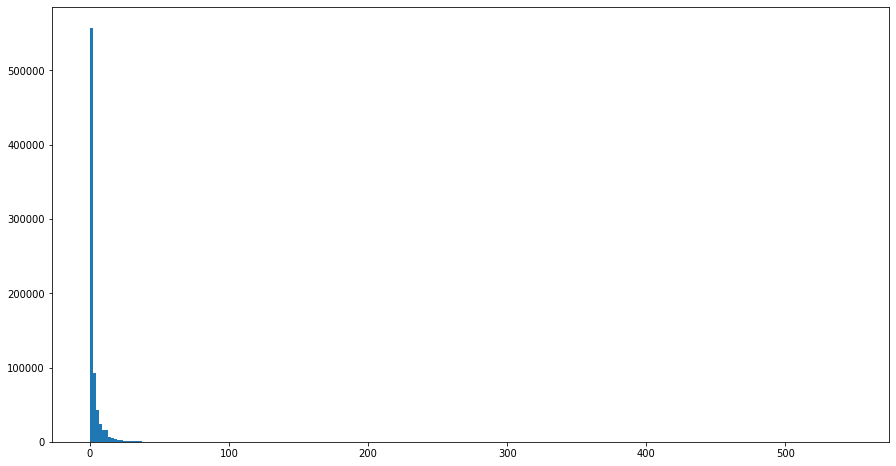

In [ ]:
lll = list(final_data.num_baskets.values)
lll.sort(reverse=True)
plt.figure(figsize=(15,8))
plt.hist(lll[1:], bins = 250)
plt.show()

## Finding Unique Products

In [5]:
# create a list of tab_2 in order
Seq_data_products = os.listdir("tab_2")
Seq_data_products_dates = []
for i in range(len(Seq_data_products)):
  Seq_data_products_dates.append(Seq_data_products[i][-14:-4])

Seq_data_products_ordered = [line for (time,line) in sorted(zip(Seq_data_products_dates, Seq_data_products))] 

In [6]:
Unique_Products = set()

for tab2 in Seq_data_products_ordered:
  data_products = pd.read_csv("tab_2/"+tab2)
  uniq_pr = list(data_products.product_id.unique())
  for i in uniq_pr:
    if i not in Unique_Products:
      Unique_Products.add(i) 

In [8]:
Unique_Products = list(Unique_Products)

print('There are', len(Unique_Products), 'unique products in baskets.')
print('These are the products we are going to use in scoring')

There are 95002 unique products in baskets.
These are the products we are going to use in scoring


## Create test set

In [ ]:
!mkdir sub

!unzip -q sample_submission.csv.zip -d sub/

In [10]:
testset_users = pd.read_csv("sub/sample_submission.csv") 
unique_testset_users = list(testset_users.Id.values)

print('There are', len(unique_testset_users), 'users in test set')

There are 107068 users in test set


In [15]:
Final_test_Dict = {"test_users":unique_testset_users, "Products": Unique_Products}

with open('Test.pickle', 'wb') as handle:
    pickle.dump(Final_test_Dict, handle, protocol=pickle.HIGHEST_PROTOCOL)